In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
class pages:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.page_id=self.get_ids(d)
        self.title_part1=self.get_title_part1(d)
        self.title_part2=self.get_title_part2(d)
        self.short_description=self.get_short_description(d)
        self.description=self.get_description(d)
        self.create_df()
    
    def get_ids(self, x):
        res=[]
        for i in range(len(x)):
            res.append(int(x[i]["id"]))
        return res
    
    def get_title_part1(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part1"])
        return res
    
    def get_title_part2(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def get_short_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description_short"])
        return res
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def create_df(self):
        dd={}
        dd["page_id"]=self.page_id
        dd["title_part1"]=self.title_part1
        dd["title_part2"]=self.title_part2
        dd["short_description"]=self.short_description
        dd["description"]=self.description
        self.df=pd.DataFrame(dd)

In [3]:
page=pages("page.json", "page")
page_df=page.df

In [4]:
page_df.head()

,page_id,title_part1,title_part2,short_description,description
0,3257,Expert Advice on Creating,The Ideal CV Layout,The importance of the CV layout cannot be unde...,<p>The importance of your&nbsp;CV layout canno...
1,2693,Linda Jones on,Female Diversity,Linda Jones speaks about the Sky initiative to...,<p>Linda Jones discusses Project Sky and outli...
2,3405,Sector:,Accounting & Finance,Apply for accounting & finance internships at ...,<h1><em>Which&nbsp;location do you want to wor...
3,233,Top Skills to Excel,In the Technology Sector,,<p>You don&#39;t have to be a world class prog...
4,87,Top Five Tips for,Creating a Successful Brand,,<p>There are misconceptions about how importan...


In [5]:
page_df.shape

(2529, 5)

In [6]:
content=page_df["description"].values

In [7]:
part_1=page_df["title_part1"].values

In [8]:
part_2=page_df["title_part2"].values

In [9]:
title=[]
for i in range(len(part_1)):
    title.append(part_1[i]+" "+part_2[i])

In [10]:
short_description=page_df["short_description"].values

In [11]:
def remove_pages(content):
    res=True
    if len(content)<10:
        res=False
    return res

In [12]:
def clean_page(title, content):
    content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","")
    content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","")
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
    content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
    content=content.replace("&rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
    content=content.replace("&ndash;"," ").replace("&pound;","").replace("\r\n \r\n","\r\n")
    content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
    content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
    content=re.sub('<.*?>',"",content , flags=re.DOTALL)
    res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
    return res

In [13]:
data=[clean_page(title[i], content[i]) for i in range(len(content))]

In [14]:
len(data)

2529

In [15]:
data=[i for i in data if remove_pages(i)]

In [16]:
len(data)

2500

In [17]:
content[102]

'<p>If you&rsquo;re reading this article, you probably already know what an investment fund is - a pool of money from many different investors, which is invested in assets like bonds, stock, property, or even diamonds or expensive wine. You probably know that hedge funds are an unusual, risky type of fund &ndash; but you might not know much more.&nbsp;</p>\r\n\r\n<p>Here&rsquo;s our plain English crash course on how hedge funds work and some of the investment techniques hedge fund manager use.</p>\r\n\r\n<p><img alt="" class="media-image" src="/media/ckeditor/import/49433-hedge-fund.jpg" style="height:425px; width:640px" /></p>\r\n\r\n<blockquote>\r\n<p>Welcome to Hedge Funds 101</p>\r\n</blockquote>\r\n\r\n<p>Hedge funds have several differences from most other investment funds.</p>\r\n\r\n<h2>Designed to make money in falling markets</h2>\r\n\r\n<p>Most investments are simple. You buy shares, bonds, property or other assets. Then you wait. The market generally increases in value over

In [18]:
data[100]

'What is a Hedge Fund\r\n If you re reading this article you probably already know what an investment fund is a pool of money from many different investors which is invested in assets like bonds stock property or even diamonds or expensive wine\r\n You probably know that hedge funds are an unusual risky type of fund but you might not know much more\r\n Here s our plain English crash course on how hedge funds work and some of the investment techniques hedge fund manager use\r\n \r\nWelcome to Hedge Funds 101\r\nHedge funds have several differences from most other investment funds\r\n Designed to make money in falling marketsMost investments are simple\r\n You buy shares bonds property or other assets\r\n Then you wait\r\n The market generally increases in value over time so most likely your assets will soon be worth more than you paid for them\r\n There are riskier investments and safer investments but no matter the risk they all depend on the value of your assets going up\r\n Hedge fun

In [19]:
class jobs:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["job_description"]=self.description
        dd["job_title"]=self.title
        self.df=pd.DataFrame(dd)

In [20]:
job=jobs("job.json", "job")
job_df=job.df

In [21]:
job_df.head()

,job_description,job_title
0,<h2>Overview</h2>\r\n\r\n<p>We are recruiting ...,Systems Engineer Graduate
1,<p>Slaughter and May is one of the most presti...,Training contract
2,"<p>As a Future Leader, you?ll get an unparalle...",Summer Placements
3,<h2>Internships at our international headquart...,International Internship Programme
4,<h2>Description</h2>\r\n\r\n<p>Our Electronics...,Graduate Electronics & Robotics Engineers


In [22]:
job_title=job_df["job_title"].values
job_description=job_df["job_description"].values

In [23]:
def clean_job(title, content):
    content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("&#39;","").replace("&eacute;","e")
    content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","")
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
    content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
    content=content.replace("&rsquo;"," ").replace("\t"," ").replace("\r\n\r\n"," ").replace(" \r\n ","")
    content=content.replace("&ndash;"," ").replace("&pound;","").replace("\r\n \r\n","\r\n")
    content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
    content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
    content=re.sub('<.*?>',"",content , flags=re.DOTALL)
    res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
    return res

In [24]:
job_data=[clean_job(job_title[i], job_description[i]) for i in range(len(job_description))]

In [25]:
len(job_data)

3954

In [26]:
job_data=[i for i in job_data if remove_pages(i)]

In [27]:
len(job_data)

3954

In [28]:
job_description[800]

'<h2>Role Description</h2>\r\n\r\n<p>L&#39;Or&eacute;al sells 50 products every second worldwide. (That&rsquo;s over 4 million products a day, if you&rsquo;re wondering.). As a Business Development (also referred to as Category Management) Intern you&rsquo;ll be working on growing our five main product categories; haircare, hair colour, fragrances, cosmetics and skincare. Business Development strengthens the relationship between retailer and supplier enabling greater collaboration to exchange information, share data and build growth of the category together.</p>\r\n\r\n<p>Your job will be to think of unique ways in which we can improve these categories, and communicate them effectively to retailers. The role also provides significant exposure to both the Sales and Marketing teams.&nbsp; You will also be liaising with several divisions within a retailer which will develop your project management skills, test your communication skills, efficiency, co-ordination and interpersonal skills, 

In [29]:
job_data[700]

'Graduate Engineer\r\n Graduate Engineer Although not a household name State Street is one of the world s largest and most important financial services institutions providing round-the-clock services to the global investment community\r\n We touch $33 trillion in assets every day and are the world s third largest investment manager with over $2\r\n 8 trillion in assets under management\r\n To do this we manage as much data as one of the internet giants on nearly as large a technical footprint\r\n  In January 2018 we launched one of the industry s largest technical transformation projects in effect building a new bank from the ground up\r\n This project isn t greenfield in the way most banks claim projects are; we ve started with a blank sheet of paper both operationally and technically\r\n We re using the same technologies that Silicon Valley giants are using aggressive use of multiple public clouds building our own private cloud to achieve even better performance pushing out microserv

In [30]:
d=pd.read_csv("data.csv")

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,12,13,14,15,17,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
d.head()

,Unnamed: 0,user_id,job_created_date,job_application_status,job_id,employer_id,job_opening_date,job_closing_date,job_short_description,job_description,...,course_includes_industrial_placement,graduation_year,right_to_work_uk,degree_subject_id,university_id,university_name,university_type,degree_subject_name,degree_subjectgroup_id,degree_subjectgroup_title
0,0,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
1,20827,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management
2,20834,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management
3,20835,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management
4,20836,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management


In [32]:
employer_title=d['employer_title'].values
employer_description=d["employer_description"].values
employer_sector=d["employer_sector_title"].values

In [33]:
def clean_employer(title, content, sector):
    try:
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","")
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("&pound;","").replace("\r\n \r\n","\r\n")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+sector+"\r\n "+content 
    except:
        res=""
    return res

In [34]:
employer_data=[clean_employer(employer_title[i], employer_description[i], employer_sector[i]) for i in range(len(employer_description))]

In [35]:
employer_data=[i for i in employer_data if remove_pages(i)]

In [36]:
employer_data = list(set(employer_data))

In [37]:
len(employer_data)

829

In [38]:
employer_description[0]

'<h3>Are you curious?</h3>\r\r\n\r\r\n<p>Solving today&rsquo;s problems takes more creativity than ever before. It requires different ways of thinking; different people working together to find simple answers to ever-more complex questions. These are the explorers, the influencers, the challengers, the people like you.</p>\r\r\n\r\r\n<p>Bring new thinking here and you&rsquo;ll find a business that doesn&rsquo;t just recognise your need to be your own curious, clever self, but fully embraces it.</p>\r\r\n\r\r\n<p>Our opportunities are as diverse as our people and the professional services we provide. You can develop a career in all the areas you&rsquo;d expect &ndash; and many more you wouldn&rsquo;t &ndash; from management consulting to cyber risk.</p>\r\r\n\r\r\n<p>Whichever path you choose, you&rsquo;ll get to work with the best minds in the industry, with guidance from inspirational senior managers, and every opportunity to grow, progress and make an impact that truly matters.</p>\r

In [39]:
employer_data[0]

'Zopa\r\n Financial Services\r\n Zopa is the UK leading peer-to-peer lending service\r\n We reward people who are good with their money by providing low rate loans and high interest returns\r\n We offer simple loans and smart investments that help people take control of their finances and do more with their money\r\n Launched in 2005 our founders were inspired by emerging online marketplaces like eBay and Betfair where customers could connect directly\r\n In the 12 years we ve been in business we ve helped more than 60000 people lend over 2 billion to 246000 UK consumers\r\n Weve also been voted Most Trusted Personal Loan Provider in the Moneywise Customer Awards for the past 7 years in a row\r\n '

In [40]:
class success_story:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def create_df(self):
        dd={}
        dd["success_description"]=self.description
        dd["success_title"]=self.title
        self.df=pd.DataFrame(dd)

In [41]:
story=success_story("success_story.json","success_story")
story_df=story.df

In [42]:
story_df.head()

,success_description,success_title
0,<p>Huge congratulations to Nathan who has secu...,Nathan on securing a role with Amazon
1,"<p>This summer, Cambridge student Carmen, will...",Summer Internship at Goldman Sachs
2,<p>We recently caught up with KCL graduate and...,Aysha secures Graduate Role at Deloitte
3,<h2>First things first</h2>\r\n\r\n<p>&middot;...,Commercial Banking - Mid-Markets & SME
4,<p>We caught up with Bright Network member Che...,Life as a consultant at Accenture


In [43]:
story_title=story_df["success_title"].values
story_description=story_df["success_description"].values

In [44]:
def clean_story(title, content):
    try:
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","")
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("&pound;","").replace("\r\n \r\n","\r\n")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content 
    except:
        res=""
    return res

In [45]:
story_data=[clean_story(story_title[i], story_description[i]) for i in range(len(story_description))]

In [46]:
len(story_data)

486

In [47]:
story_description[0]

'<p>Huge congratulations to Nathan who has secured a graduate role with Amazon starting in September. We caught up with Nathan while he enjoys his summer to get his inside scoop on the application process and his tips for his fellow Bright Network members who want to apply to Amazon.&nbsp;</p>\r\n\r\n<p><img alt="" src="/media/ckeditor/2018/08/13/nathan.png" style="height:997px; width:664px" /></p>\r\n\r\n<h2>Why did you apply to Amazon?</h2>\r\n\r\n<p>I&rsquo;ve always been really interested in gadgets and technology and Amazon are known for making some of the best technologies around, just look at Alexa. So, for me to be able to work for a company who specialise in producing all these different technologies was just always sort of my ideal job. Also, Amazon are one of the biggest companies in the world so to work for them would be an unforgettable experience and one I felt I could learn a lot from.</p>\r\n\r\n<h2>What was the application process like?</h2>\r\n\r\n<p>First, I had to s

In [48]:
story_data[0]

'Nathan on securing a role with Amazon\r\n Huge congratulations to Nathan who has secured a graduate role with Amazon starting in September\r\n We caught up with Nathan while he enjoys his summer to get his inside scoop on the application process and his tips for his fellow Bright Network members who want to apply to Amazon\r\n Why did you apply to Amazon\r\n I ve always been really interested in gadgets and technology and Amazon are known for making some of the best technologies around just look at Alexa\r\n So for me to be able to work for a company who specialise in producing all these different technologies was just always sort of my ideal job\r\n Also Amazon are one of the biggest companies in the world so to work for them would be an unforgettable experience and one I felt I could learn a lot from\r\n What was the application process like\r\n First I had to submit my C\r\n V\r\n online and then when I got through the screening stage I had to do a video interview online\r\n In thi

In [49]:
class event:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["event_description"]=self.description
        dd["event_title"]=self.title
        self.df=pd.DataFrame(dd)

In [50]:
ev=event("event.json","event")
event_df=ev.df

In [51]:
event_description=event_df["event_description"].values
event_title=event_df["event_title"].values

In [52]:
def clean_event(title, content):
    try:
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","")
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("&pound;","").replace("\r\n \r\n","\r\n")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content 
    except:
        res=""
    return res

In [53]:
event_data=[clean_event(event_title[i], event_description[i]) for i in range(len(event_description))]

In [54]:
len(event_data)

291

In [55]:
event_description[0]

'<p>Looking to find out how you can accelerate your career with an exceptional masters programme at this UK top four business school. This Online Information Session, hosted by Associate Dean, Dr Nick Motson will focus on finance group of master&#39;s courses:</p>\r\n\r\n<ul>\r\n\t<li>MSc in Banking &amp; International Finance</li>\r\n\t<li>MSc in Corporate Finance</li>\r\n\t<li>MSc in Finance</li>\r\n\t<li>MSc in International Accounting &amp; Finance</li>\r\n\t<li>MSc in Investment Management</li>\r\n</ul>\r\n\r\n<p>Apply today for your chance to find out how&nbsp;Cass Business School&#39;s masters programmes can give you the competitive edge.&nbsp;</p>'

In [56]:
event_data[0]

"Finance Master's Courses Online Information Session\r\n Looking to find out how you can accelerate your career with an exceptional masters programme at this UK top four business school\r\n This Online Information Session hosted by Associate Dean Dr Nick Motson will focus on finance group of master courses\r\n MSc in Banking & International Finance\r\n MSc in Corporate Finance\r\n MSc in Finance\r\n MSc in International Accounting & Finance\r\n MSc in Investment Management\r\nApply today for your chance to find out how Cass Business School masters programmes can give you the competitive edge\r\n "

In [57]:
test=pd.read_csv("data job posts.csv")

In [58]:
test.shape

(19001, 24)

In [59]:
test=test.sample(frac=0.2)

In [60]:
test.shape

(3800, 24)

In [61]:
job_posts=test["jobpost"].values

In [62]:
def clean_job_posts(x):
    res=""
    a=x.split("\r\n")
    n=len(a)
    while n>0:
        for i,sentence in enumerate(a):
            if len(sentence)>3:
                if sentence[0].islower():
                    a[i-1]=a[i-1]+" "+sentence
                    a.remove(sentence)
                    break
            else:
                a.remove(sentence)
                break
        n=n-1
    for i in a:
        res+=i+"\r\n "
    res=res.replace("--","").replace("..","")
    res=res.replace(".","")
    return res

In [63]:
job_posts_data=[clean_job_posts(job_posts[i]) for i in range(len(job_posts))]

In [64]:
len(job_posts_data)

3800

In [65]:
all_data=data+job_data+employer_data+story_data+event_data

In [66]:
len(all_data)

8060

In [67]:
all_data[0]

'Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated\r\n Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready\r\n\r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n '

In [68]:
all_data=[i for i in all_data if len(i)>4]

In [69]:
all_data[:3]

['Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated\r\n Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready\r\n\r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n ',
 'Linda Jones on Female Diversity\r\n Linda Jones discusses Project Sky and outlines how Pinset Masons are introducing initiatives to address the gender imbalance in the corporate world\r\n ',
 'Sector: Accounting & Finance\r\n Which location do you want to work in\r\n  LONDON click hereMANCHESTER click hereBRISTOL click here Find internships in a variety of roles in the Accounting &

In [70]:
def remove_stopwords(x):
    res=[]
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,document in enumerate(x):
        sentences=document.split("\r\n")
        if len(sentences)>1:
            new_sentences=[]
            for sentence in sentences:
                words=sentence.split(" ")
                try:
                    lk=''
                    while True:
                        words.remove(lk)
                except:
                    pass
                if len(words)>1:
                    new_words=[]
                    for word in words:
                        word=word.lower()
                        if word not in stop:
                            new_words.append(word)
                    a=""
                    for l,k in enumerate(new_words):
                        if l<len(new_words):
                            a+=k+" "
                        else:
                            a+=k
                    a+="\r\n "
                    new_sentences.append(a)
        b=""
        for k in new_sentences:
            b+=k
        res.append(b)
    return res

In [71]:
documents=remove_stopwords(all_data)

In [72]:
documents[0]

'expert advice creating ideal cv layout \r\n importance cv layout understated \r\n making cv visually impactful vital information contains \r\n however understand time consuming tricky ordeal \r\n luckily head marketing ben triggs hand take whirlwind detailed tour \r\n get notepads ready \r\n employers just request cv \r\n sometimes application form required means adopting different approach \r\n find stand employer application form \r\n '

# Word2vec

In [73]:
def get_data_word2vec(x):
    res=[]
    for document in x:
        sentences=document.split("\r\n")
        for sentence in sentences:
            if len(sentence)>1:
                sentence=sentence.replace("&pound;","").replace("We;re","").replace(";"," ")
                sentence=sentence.replace("We;ll","").replace(":"," ").replace("&quot;","")
                sentence = ''.join([i for i in sentence if not i.isdigit()])
                a=sentence.split(" ")
                try:
                    lk=''
                    while True:
                        a.remove(lk)
                except:
                    pass
                res.append(a)
    return res

In [74]:
sentences=get_data_word2vec(documents)

In [75]:
sentences[9]

['linda', 'jones', 'female', 'diversity']

In [76]:
def create_corpus_file(path, x):
    with open(path, 'w', encoding="UTF-8") as f:
        for item in x:
            a=""
            for i in item:
                a+=i+" "
            a+="\n"
            f.write(a)

In [77]:
create_corpus_file("corpus.txt", sentences)

In [78]:
model = Word2Vec(sentences, min_count=5, size=200,
        window=5,
        workers=10)

In [79]:
model.train(sentences, total_examples=len(sentences), epochs=50)

(93571867, 99749100)

In [80]:
print(model)

Word2Vec(vocab=13105, size=200, alpha=0.025)


In [81]:
words = list(model.wv.vocab)

In [82]:
model.save('model.bin')

In [83]:
#model = Word2Vec.load('model.bin')

# Visualisation

In [84]:
X = model[model.wv.vocab]

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [85]:
X.shape

(13105, 200)

In [86]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [87]:
print(pca.explained_variance_ratio_)

[0.02869076 0.02596807]


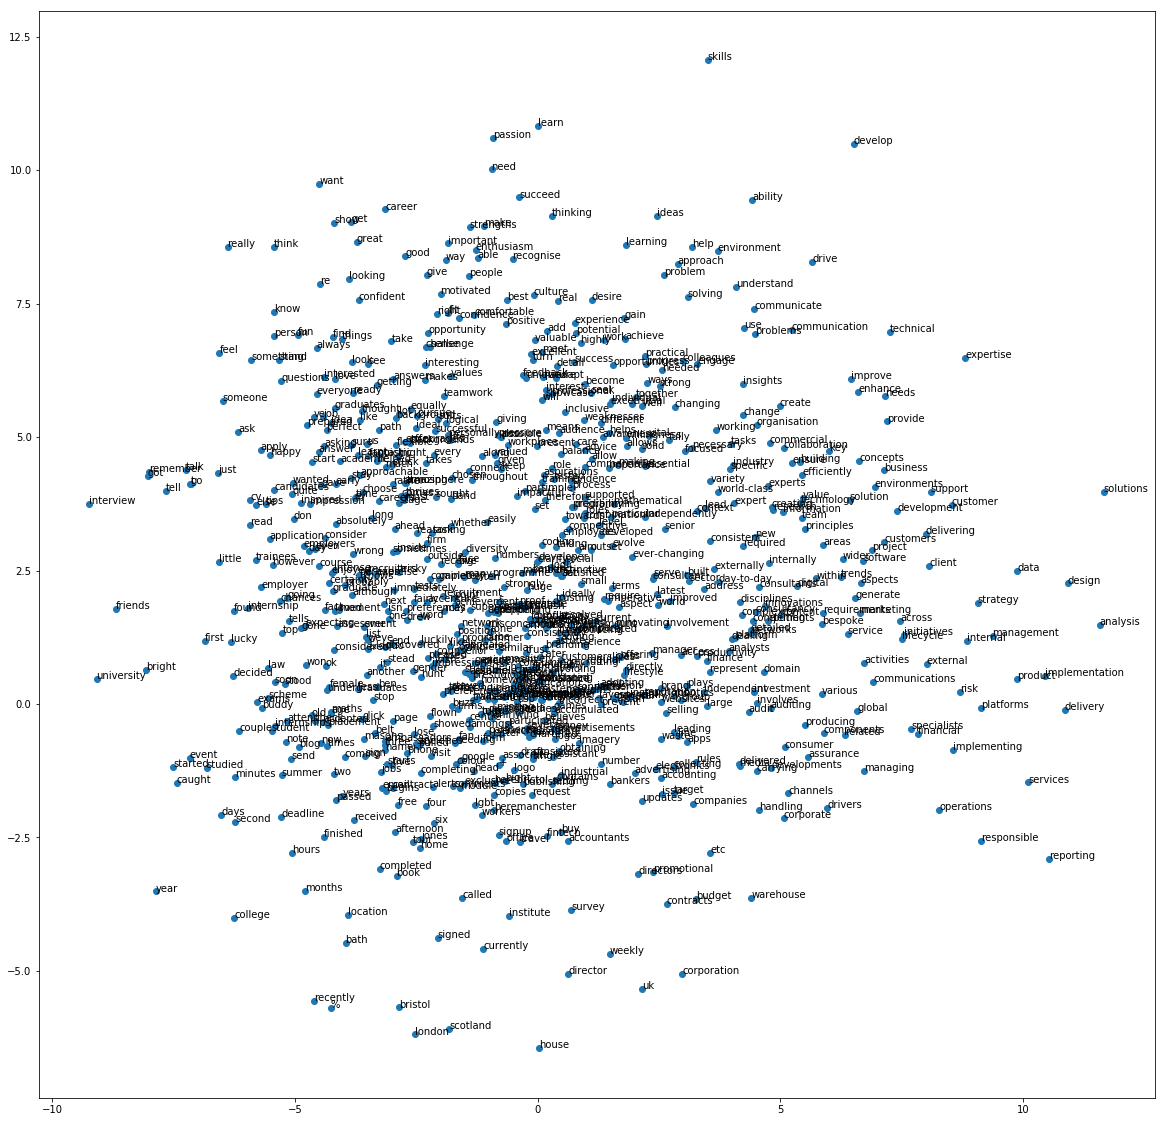

In [88]:
k=800
plt.figure(figsize=(20,20))
plt.scatter(result[:k, 0], result[:k, 1])
for i, word in enumerate(words[:k]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [98]:
model.wv.most_similar(positive="job")

[('role', 0.49010512232780457),
 ('something', 0.40502503514289856),
 ('jobs', 0.3630340099334717),
 ('position', 0.3113710880279541),
 ('however', 0.28737127780914307),
 ('scheme', 0.2815623879432678),
 ('time', 0.27773338556289673),
 ('career', 0.2729884088039398),
 ('programme', 0.27213895320892334),
 ('full-time', 0.26760461926460266)]

In [90]:
model.wv.most_similar(positive="pwc")

[('deloitte', 0.48851367831230164),
 ('ey', 0.44755905866622925),
 ('kpmg', 0.4126465320587158),
 ('accenture', 0.36578911542892456),
 ('bdo', 0.33687824010849),
 ('capgemini', 0.3291339874267578),
 ('firm', 0.30297964811325073),
 ('nao', 0.2985789179801941),
 ('vodafone', 0.29567861557006836),
 ('lazard', 0.2861999273300171)]

In [91]:
model.wv.most_similar(positive="p&g")

[('dre', 0.3542914092540741),
 ('gillette', 0.33255064487457275),
 ('exxonmobil', 0.3174499273300171),
 ('anne', 0.29812073707580566),
 ('fawley', 0.2907026410102844),
 ('selfridges', 0.2861413359642029),
 ('finland', 0.28559795022010803),
 ('ended', 0.2847566604614258),
 ('nordics', 0.27928426861763),
 ('loreal', 0.2746906578540802)]

In [99]:
model.wv.most_similar(positive="success")

[('growth', 0.322819322347641),
 ('believe', 0.3204474449157715),
 ('goals', 0.30692845582962036),
 ('strength', 0.3031230866909027),
 ('buy-in', 0.2940058708190918),
 ('mission', 0.2886682152748108),
 ('successes', 0.2885124385356903),
 ('vision', 0.27749836444854736),
 ('courage', 0.26657184958457947),
 ('successful', 0.26169654726982117)]

In [100]:
model.wv.most_similar(positive="oxford")

[('exeter', 0.5738884806632996),
 ('swansea', 0.5117723941802979),
 ('cambridge', 0.506007194519043),
 ('birthplace', 0.48782414197921753),
 ('durham', 0.4790351986885071),
 ('imperial', 0.47679269313812256),
 ('bath', 0.47312262654304504),
 ('warwick', 0.4724554121494293),
 ('manchester', 0.4620092511177063),
 ('aston', 0.4530452787876129)]

In [101]:
model.wv.most_similar(positive="cv")

[('letter', 0.4784747362136841),
 ('application', 0.4522167444229126),
 ('resume', 0.34357044100761414),
 ('paragraph', 0.3413230776786804),
 ('applicationthe', 0.33291953802108765),
 ('answers', 0.3304765224456787),
 ('examples', 0.32354024052619934),
 ('paste', 0.32316291332244873),
 ('interview', 0.31692591309547424),
 ('interviewer', 0.3117510676383972)]

In [102]:
model.wv.most_similar(positive="event")

[('events', 0.4909866154193878),
 ('festival', 0.4613586366176605),
 ('conference', 0.42724013328552246),
 ('areaevent', 0.3885953426361084),
 ('evening', 0.37546199560165405),
 ('dinner', 0.37178835272789),
 ('workshop', 0.3584521412849426),
 ('fairs', 0.3472685217857361),
 ('ceremony', 0.3332340121269226),
 ('speakers', 0.33186283707618713)]

In [103]:
model.wv.most_similar(positive="consulting")

[('consultancy', 0.5390430092811584),
 ('advisory', 0.44859033823013306),
 ('consultant', 0.4285131096839905),
 ('accountancy', 0.3917737603187561),
 ('specialising', 0.3845331072807312),
 ('consultants', 0.3656040132045746),
 ('fs', 0.33909332752227783),
 ('actuarial', 0.33856621384620667),
 ('ey', 0.32938799262046814),
 ('specialise', 0.3208097815513611)]

In [104]:
model.wv.most_similar(positive="lawyers")

[('solicitors', 0.4711028039455414),
 ('lawyer', 0.4581371545791626),
 ('trainees', 0.4509299397468567),
 ('law', 0.4365023076534271),
 ('solicitor', 0.3634639382362366),
 ('bankers', 0.35545533895492554),
 ('professionals', 0.3552757501602173),
 ('barristers', 0.35134613513946533),
 ('legal', 0.33453941345214844),
 ('earners', 0.3263455629348755)]

In [105]:
model.wv.most_similar(positive="internship")

[('placement', 0.6029692888259888),
 ('internships', 0.6012072563171387),
 ('intern', 0.5571521520614624),
 ('spring', 0.4578852355480194),
 ('graduate', 0.4564191699028015),
 ('interns', 0.4282144606113434),
 ('analyst', 0.4165807366371155),
 ('summer', 0.41456809639930725),
 ('vacation', 0.3996548056602478),
 ('associate', 0.3767573833465576)]

In [106]:
model.wv.most_similar(positive="marketing")

[('advertising', 0.4734347462654114),
 ('bb', 0.46813836693763733),
 ('rpo', 0.45907533168792725),
 ('pr', 0.45146363973617554),
 ('sales', 0.4367903470993042),
 ('communications', 0.4183945655822754),
 ('media', 0.39677637815475464),
 ('merchandising', 0.39652979373931885),
 ('gcs', 0.39297059178352356),
 ('strategy', 0.3868395984172821)]

In [89]:
model["marketing"]

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.04368334,  0.7131422 , -2.6099102 , -4.4968004 , -3.0053403 ,
        0.94501984, -1.4424788 , -3.8303423 , -2.8814886 ,  0.60923207],
      dtype=float32)